## A/B Testing

In [ ]:
In modern data analytics, deciding whether two numerical samples come from the same
underlying distribution is called A/B testing. The name refers to the labels of the two
samples, A and B.

#### Smokers and Nonsmokers

The dataset "baby.csv" contains the following variables for 1,174 mother-baby pairs: 
the baby's birth weight in ounces, 
the number of gestational days, 
the mother's age in completed years,
the mother's height in inches, 
pregnancy weight in pounds, and 
whether or not the mother smoked during pregnancy.

### One of the aims of the study was to see whether maternal smoking was associated with birth weight.

##### Start by selecting just Birth Weight and Maternal Smoker. There are 715 nonsmokers among the women in the sample, and 459 smokers.

In [ ]:
import matplotlib
import matplotlib.pyplot as plots
%matplotlib inline
import numpy as np

In [ ]:
import pandas as pd

In [ ]:
baby = pd.read_csv('https://github.com/data-8/textbook/raw/gh-pages/data/baby.csv')

In [ ]:
# or from 'https://raw.githubusercontent.com/data-8/textbook/gh-pages/data/baby.csv'

In [ ]:
baby.to_csv('E:/2020/DS/19AI611/python_data_csv/baby.csv')

In [ ]:
baby

,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
0,120,284,27,62,100,False
1,113,282,33,64,135,False
2,128,279,28,64,115,True
3,108,282,23,67,125,True
4,136,286,25,62,93,False
...,...,...,...,...,...,...
1169,113,275,27,60,100,False
1170,128,265,24,67,120,False
1171,130,291,30,65,150,True
1172,125,281,21,65,110,False


In [ ]:
smoking_and_birthweight = baby[['Maternal Smoker', 'Birth Weight']]
smoking_and_birthweight

,Maternal Smoker,Birth Weight
0,False,120
1,False,113
2,True,128
3,True,108
4,False,136
...,...,...
1169,False,113
1170,False,128
1171,True,130
1172,False,125


In [ ]:
smoking_and_birthweight['Maternal Smoker'] == True

0       False
1       False
2        True
3        True
4       False
        ...  
1169    False
1170    False
1171     True
1172    False
1173    False
Name: Maternal Smoker, Length: 1174, dtype: bool

In [ ]:
smoker = smoking_and_birthweight['Birth Weight'] [smoking_and_birthweight['Maternal Smoker'] == True]
smoker

2       128
3       108
8       143
10      144
11      141
       ... 
1162    143
1163    113
1164    109
1165    103
1171    130
Name: Birth Weight, Length: 459, dtype: int64

In [ ]:
non_smoker = smoking_and_birthweight['Birth Weight'] [smoking_and_birthweight['Maternal Smoker'] == False]
non_smoker

0       120
1       113
4       136
5       138
6       132
       ... 
1168    132
1169    113
1170    128
1172    125
1173    117
Name: Birth Weight, Length: 715, dtype: int64

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000005623508>,
      dtype=object)

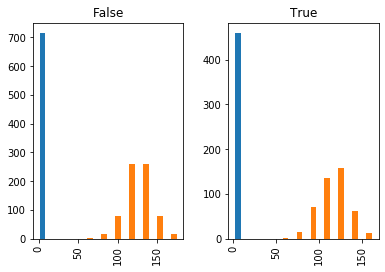

In [ ]:
smoking_and_birthweight.hist(by ='Maternal Smoker')

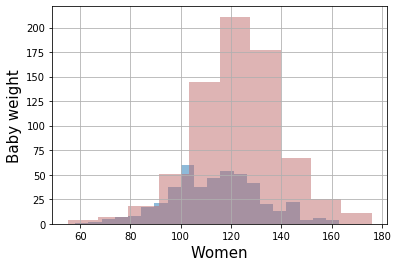

In [ ]:
import seaborn as sns
smoker.hist(histtype='stepfilled', alpha=.5, bins=20)   # default number of bins = 10
non_smoker.hist(histtype='stepfilled', alpha=.5, color=sns.desaturate("indianred", .75), bins=10)
plt.xlabel('Women',fontsize=15)
plt.ylabel('Baby weight',fontsize=15)
plt.show()

The distribution of the weights of the babies born to mothers who smoked appears to be
shifted slightly to the left of the distribution corresponding to non-smoking mothers. The
weights of the babies of the mothers who smoked seem lower, on average than the weights
of the babies of the non-smokers. 

### The Hypotheses
We can try to answer this question by a test of hypotheses. The chance model that we will
test says that there is no underlying difference; the distributions in the samples are different
just due to chance. Formally, this is the null hypothesis.
Null hypothesis: In the population, the distribution of birth weights of babies is the same for
mothers who don't smoke as for mothers who do. The difference in the sample is due to chance.
Alternative hypothesis: In the population, the babies of the mothers who smoke have a
lower birth weight, on average, than the babies of the non-smokers. """

### Test Statistic
The alternative hypothesis compares the average birth weights of the two groups and says
that the average for the mothers who smoke is smaller. Therefore it is reasonable for us to
use the difference between the two group means as our statistic.

We will do the subtraction in the order "average weight of the smoking group - average
weight of the non-smoking group". Small values (that is, large negative values) of this
statistic will favor the alternative hypothesis

The observed value of the test statistic is about -9.3 ounces.
means_table = smoking_and_birthweight.group('Maternal Smoker',np.average)
means_table

In [ ]:
means_table = smoking_and_birthweight.groupby('Maternal Smoker').mean()
type(means_table)

pandas.core.frame.DataFrame

In [ ]:
means_table

,Birth Weight
Maternal Smoker,
False,123.085315
True,113.819172


In [ ]:
observed_difference = means_table['Birth Weight'][1] - means_table['Birth Weight'][0]

### Predicting the Statistic Under the Null Hypothesis

To see how the statistic should vary under the null hypothesis, we have to figure out how to
simulate the statistic under that hypothesis. A clever method based on random permutations
does just that.

#### Random permutation.

If there were no difference between the two distributions in the underlying population, then whether a birth weight has the label True or False with respect to maternal smoking should make no difference to the average. The idea, then, is to shuffle all the birth weights randomly among the mothers. This is called random permutation.

Take the difference of the two new group means: the mean of the shuffled weights assigned to the smokers and the mean of the shuffled weights assigned to the non-smokers. This is a simulated value of the test statistic under the null hypothesis.

In [ ]:
smoking_and_birthweight

,Maternal Smoker,Birth Weight
0,False,120
1,False,113
2,True,128
3,True,108
4,False,136
...,...,...
1169,False,113
1170,False,128
1171,True,130
1172,False,125


There are 1,174 rows in the table. To shuffle all the birthweights, we will draw a random
sample of 1,174 rows without replacement. Then the sample will include all the rows of the
table, in random order.
We can use the method sample with the optional replace=False argument.


In [ ]:
shuffled = smoking_and_birthweight.sample(1174,replace = False)
shuffled

,Maternal Smoker,Birth Weight
990,False,136
806,False,126
173,False,107
489,True,101
213,True,154
...,...,...
658,False,109
176,False,136
1040,False,124
328,False,118


In [ ]:
shuffled_weights = shuffled['Birth Weight']
type(shuffled_weights)

pandas.core.series.Series

In [ ]:
original_and_shuffled= smoking_and_birthweight.assign(shuffled_weights=shuffled_weights.values )

In [ ]:
original_and_shuffled

,Maternal Smoker,Birth Weight,shuffled_weights
0,False,120,136
1,False,113,126
2,True,128,107
3,True,108,101
4,False,136,154
...,...,...,...
1169,False,113,109
1170,False,128,136
1171,True,130,124
1172,False,125,118


Each mother now has a random birth weight assigned to her. If the null hypothesis is true, all these random arrangements should be equally likely. See how different the average weights are in the two randomly selected groups. 

In [ ]:
all_group_means= original_and_shuffled.groupby('Maternal Smoker').mean()
all_group_means

,Birth Weight,shuffled_weights
Maternal Smoker,,
False,123.085315,119.707692
True,113.819172,119.080610


The averages of the two randomly selected groups are quite a bit closer than the averages of the two original groups.

In [ ]:
difference = all_group_means['shuffled_weights'][0]- all_group_means['shuffled_weights'][1]
difference

0.6270822859058143

#### But could a different shuffle have resulted in a larger difference between the group average

To get a sense of the variability, simulate the difference many times. 

##### One simulation

In [ ]:
smoking_and_birthweight = baby[['Maternal Smoker', 'Birth Weight']]
shuffled = smoking_and_birthweight.sample(1174,replace = False)
shuffled_weights = shuffled['Birth Weight']
original_and_shuffled = smoking_and_birthweight.assign(shuffled_weights=shuffled_weights.values )
all_group_means= original_and_shuffled.groupby('Maternal Smoker').mean()
difference = all_group_means['shuffled_weights'][0]- all_group_means['shuffled_weights'][1]
difference

-1.1794292853116275

#### Permutation Test

Tests based on random permutations of the data are called permutation tests. Simulate the test statistic – the
difference between the averages of the two groups – many times and collect the differences in an array. 

In [ ]:
import numpy as np
import array
differences = np.zeros(5000)

In [ ]:
for i in np.arange(5000):
    smoking_and_birthweight = baby[['Maternal Smoker', 'Birth Weight']]
    shuffled = smoking_and_birthweight.sample(1174,replace = False)
    shuffled_weights = shuffled['Birth Weight']
    original_and_shuffled = smoking_and_birthweight.assign(shuffled_weights=shuffled_weights.values )
    all_group_means= original_and_shuffled.groupby('Maternal Smoker').mean()
    difference = all_group_means['shuffled_weights'][0]- all_group_means['shuffled_weights'][1]
    differences[i] = difference

In [ ]:
differences

array([-0.76089096,  0.61992778,  0.37667474, ..., -0.42105215,
        0.74155431, -0.60706918])

In [ ]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
differences_df = pd.DataFrame(differences)
differences_df

,0
0,-0.760891
1,0.619928
2,0.376675
3,-0.392434
4,2.086601
...,...
4995,0.090495
4996,-0.052595
4997,-0.421052
4998,0.741554


Observed Difference: -9.266142572024918


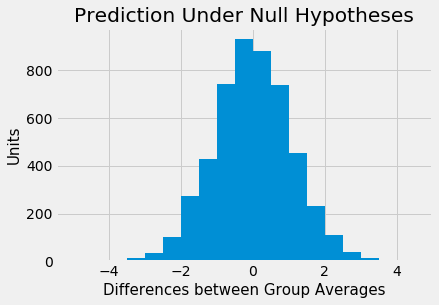

In [ ]:
differences_df.hist(bins = np.arange(-5,5,0.5))
plt.title('Prediction Under Null Hypotheses');
plt.xlabel('Differences between Group Averages',fontsize=15)
plt.ylabel('Units',fontsize=15);
print('Observed Difference:', observed_difference)

Notice how the distribution is centered around 0. This makes sense, because under the null hypothesis the two groups should have roughly the same average. Therefore the difference between the group averages should be around 0.

The observed difference in the original sample is about -9.27 ounces, which doesn't even appear on the horizontal scale of the histogram. The observed value of the statistic and the predicted behavior of the statistic under the null hypothesis are inconsistent.

#### The conclusion of the test is that the data support the alternative more than they support the null. The average birth weight of babies born to mothers who smoke is less than the average birth weight of babies born to non-smokers. 

If you want to compute an empirical P-value, remember that low values of the statistic favor
the alternative hypothesis.

In [ ]:
np.count_nonzero(differences <= observed_difference)/differences.size

0.0

The empirical P-value is 0, meaning that none of the 5,000 observed samples resulted in a difference of -9.27 or lower. This is an approximation; the exact chance of getting a difference in that range is not 0 but it is vanishingly small.

#### Assignment - Write a Function to Simulate the Differences Under the Null Hypothesis and test whether there was any difference in the ages of the smoking and non-smoking mothers.